<a href="https://colab.research.google.com/github/umesh-thatikonda/MissionRnD_python-course/blob/master/880ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import numpy as np
import pandas as pd
import random as rnd
import plotly.express as px
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
df = pd.read_csv(r'/content/abalone.csv')

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
# Changing the column names for better readability
newCols = list(map(lambda x : x.lower().replace(' ', '_'), df.columns))

df.columns = newCols

In [9]:
df.info() # Checking the columns meta deta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [10]:
# CHecking for null values
df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [11]:
# Creation of age feature as directed in the assignment questions.
# add 1.5 to the rings count to get the age

df['Age'] = df['rings'] + 1.5
 
df.drop('rings', inplace=True, axis=1) # Dropping rings feature as we have extracted age out from rings columns

In [12]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


It is observed that the minimum value for height is zero, which is most probably due to an error while data collection activity. We will investigate this in the next steps and take appropriate measures

In [13]:
df[df['height']==0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


There are only two records with height as zero this is definitely a error as diameter, wieghts are non zero. They can be dropped or the height can be replaced with median or median after checking the distribution of the height column

In [14]:
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [15]:
# see the distibution of hieghts information
fig = px.histogram(df, x="height", title="Distribution of height" )
fig.show()

##### After closly observing the distribution of the height data, which is nearly normal distributed. The zero height records can be replaced with mean of the height columns

In [16]:
df['height'][df['height'] == 0]=df.height.mean() # Replacing zero height with mean of height

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Univaraite Analysis

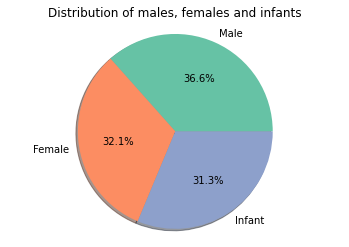

In [17]:
# pie chart of workers
labels = ['Male', 'Female', 'Infant']
sizes = df.sex.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title("Distribution of males, females and infants")
plt.show()

It is observed that the count of males, females and infants are almost equal, there is no clear domination of a specific gender types in the data

In [18]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Height', "Whiscker plot for  height"))
fig.add_trace(go.Histogram(x=df['height']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['height'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Height')
    
    , row=1, col=2)

fig.show()


After looking at the distribution of the data and the box plot we can observe that the data is nearly normally distributed, has little outliers

In [19]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [20]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for lenght', "Whiscker plot for  length"))
fig.add_trace(go.Histogram(x=df['length']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['length'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='length')
    
    , row=1, col=2)

fig.show()


The feature length, We observe that the data is left skewed and has few outliers

In [21]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [22]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for viscera_weight', "Whiscker plot for  viscera_weight"))
fig.add_trace(go.Histogram(x=df['viscera_weight']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['viscera_weight'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='viscera_weight measuremnet')
    
    , row=1, col=2)

fig.show()


In [23]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for shucked_weight', "Whiscker plot for  shucked_weight"))
fig.add_trace(go.Histogram(x=df['shucked_weight']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['shucked_weight'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='shucked_weight measuremnet')
    
    , row=1, col=2)

fig.show()


In [24]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for whole_weight', "Whiscker plot for  whole_weight"))
fig.add_trace(go.Histogram(x=df['whole_weight']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['whole_weight'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='whole_weight measuremnet')
    
    , row=1, col=2)

fig.show()


All the weight features show very similar distribution and all of them are heavily right skewed also suggests that these are highly correlated features would be further investigated later


In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for diameter', "Whiscker plot for  diameter"))
fig.add_trace(go.Histogram(x=df['diameter']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['diameter'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Diameter measuremnet')
    
    , row=1, col=2)

fig.show()


For the feature "Diameter", the data is nominally left skewed and by observing the whisker plot, we can confirm that it is having no outliers. Therefore might not have a negative impact on the statistical modelling built using the data

In [ ]:

fig = make_subplots(rows=1, cols=2, subplot_titles=('Distribution for Age', "Whiscker plot for  Age"))
fig.add_trace(go.Histogram(x=df['Age']), row=1, col=1)
fig.add_trace(
    go.Violin(y=df['Age'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Age')
    
    , row=1, col=2)

fig.show()


The Response variable "Age", almost closelt normal distributed has skewness towards right side but not significance though. We shall investigate this more in the further process

Bi Variate Analysis

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="rings", color="sex", nbins=100, title= "Histogram for Male, Female and Infant")
fig.show()



*   All the gender categories show few outliers
*   Infant data is very hravily right skewed shows that most of the data has less than 11 years of age
*   For male and female data, the characteristics are very similar characteristics have data points starting from age 6 and steadily increases 






In [ ]:
import plotly.express as px
fig = px.bar(df, x="length", color="sex",  title= "Analysis of length vs gender")
fig.show()

In [ ]:
import plotly.express as px
fig = px.bar(df, x="height", color="sex",  title= "Analysis of height vs gender")
fig.show()

In [25]:
# COnvert text to numeric columns

labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


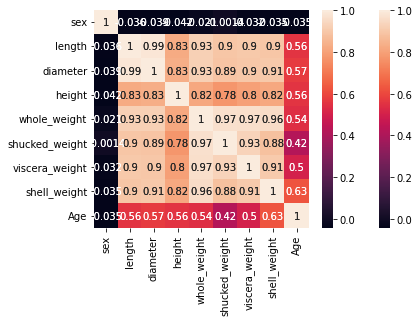

In [26]:

#ploting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

sns.heatmap(df.corr(), annot=True)

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(df.columns[:-2])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]



vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,VIF,Column
2,739.869009,diameter
1,693.993499,length
4,142.755007,whole_weight
5,62.867903,shucked_weight
6,57.102315,viscera_weight
3,42.117620,height
0,2.552200,sex


Since we have to perform a regression, we have to investigate for multi colinearity in the data. The test for VIF would help us understand the colinearity between the features.



Generally, a VIF of less than 5 is safe number to assume less multi colinearity among the features.



almost all the features except "sex" show high colinearity among the features. Now either the features to be removed or the features to be transformed to avoid this multicolinearity. But the removal of features would some time lead to loss of information. We shall transform the features and again test for VIF

In [28]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age'],
      dtype='object')

In [29]:
df['volume'] = df['diameter']+df['diameter']+df['height']

In [30]:
# z = df[['height','sex', 'shucked_weight']]


z = df[['volume','sex', 'shucked_weight']]

In [31]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age', 'volume'],
      dtype='object')

In [32]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif_info['Column'] = z.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,11.287640,volume
2,8.668894,shucked_weight
1,2.451180,sex


After observing the features, there are 4 different types of weights "whole_weight", "shucked_weight", "viscera_weight" and "shel_weight" and these columns are very highly correlated to each other this can be understood by looking at the VIF table and correlation matrix. 

We also observed that the columns height, diameter and length also showing high colinearity. A new feature "volume" is created using height, length and diameter 

The lesser correlated columns are "shucked_weight", "volume" and "sex". So the final chosen columns for the modelling excercise is "volume", "sex" and "shucked_weight"


Since the number of features are less in number after removal of multi colinearity, feature selection process is skipped and model building is carried out




For better modelling performance, the feature "age" data is seperated  into classes which would be created based on the age count, minimum and maximum age values in the feature "age"

In [95]:
df.Age.value_counts().sort_index()

4.5      15
5.5      57
6.5     115
7.5     259
8.5     391
9.5     568
10.5    689
11.5    634
12.5    487
13.5    267
14.5    203
15.5    126
16.5    103
17.5     67
18.5     58
19.5     42
20.5     32
21.5     26
22.5     14
23.5      6
24.5      9
Name: Age, dtype: int64

After observing the value counts results for the "age" feature, two classes shall be created based on the age values.

class -> 0 when age is less than 12
class -> 1 when age is greater than or equal to 12 


In [182]:
df['Class'] = df['Age'].apply(lambda x : 0 if x <12 else 1)

In [184]:
DataBinClf = df[['sex', 'volume', 'shucked_weight',  'Class']]


X = DataBinClf.drop(['Class'], axis=1)
y = DataBinClf[['Class']]

X_train , X_test, y_train, y_test = train_test_split(X, y, stratify=y['Class'])
print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)

# 


(3126, 3) (3126, 1)
(1042, 3) (1042, 1)


In [185]:
def RunBinClfAlgos(xtrain, xtest,ytrain, ytest):


# Naive Bayes Classification
    HyperParamsDictNb = {
    'var_smoothing': np.logspace(0,-9, num=100) # Calculation Stability to␣
    }

    NiaveBayes_mdl = GridSearchCV(estimator=GaussianNB(), param_grid=HyperParamsDictNb,verbose=1,
    cv=10, n_jobs=-1)
    NiaveBayes_mdl.fit(X_train, y_train)

    y_pred = NiaveBayes_mdl.predict(X_test)

    ClfMet['NB'] = {}

    ClfMet['NB']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['NB']['Acc'] = accuracy_score(y_test, y_pred)

# Support Vector Classification
    HyperParametersSVC = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['rbf']}
    SVC_Clf = GridSearchCV(svm.SVC(),HyperParametersSVC,refit = True, verbose=2)
    SVC_Clf.fit(X_train, y_train)
    y_pred = SVC_Clf.predict(X_test)

    ClfMet['SVC'] = {}
    ClfMet['SVC']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['SVC']['Acc'] = accuracy_score(y_test, y_pred)

# Random Forest Classification
    RF_CLF=RandomForestClassifier(random_state=42)

    HyperParams_RFC = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,7,8],
        'criterion' :['gini', 'entropy']
    }


    CV_rfc = GridSearchCV(estimator=RF_CLF, param_grid=HyperParams_RFC, cv= 3)
    CV_rfc.fit(X_train, y_train)
    y_pred = CV_rfc.predict(X_test)

    ClfMet['RF'] = {}

    ClfMet['RF']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['RF']['Acc'] = accuracy_score(y_test, y_pred)

    return ClfMet 

RunBinClfAlgos(X_train , X_test, y_train, y_test)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-package

{'DecsTree': {'Acc': 0.4654510556621881, 'Precision': 0.4654510556621881},
 'NB': {'Acc': 0.6976967370441459, 'Precision': 0.6976967370441459},
 'RF': {'Acc': 0.7610364683301344, 'Precision': 0.7610364683301344},
 'SVC': {'Acc': 0.7706333973128598, 'Precision': 0.7706333973128598}}

In [186]:
pd.DataFrame({'DecsTree': {'Acc': 0.4654510556621881, 'Precision': 0.4654510556621881},
 'NB': {'Acc': 0.6976967370441459, 'Precision': 0.6976967370441459},
 'RF': {'Acc': 0.7610364683301344, 'Precision': 0.7610364683301344},
 'SVC': {'Acc': 0.7706333973128598, 'Precision': 0.7706333973128598}})

,DecsTree,NB,RF,SVC
Acc,0.465451,0.697697,0.761036,0.770633
Precision,0.465451,0.697697,0.761036,0.770633


In [94]:
df = df[df['Age'] > 3.5  ]
df = df[df['Age'] < 25.5  ]

In [122]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'Age', 'volume', 'class'],
      dtype='object')

In [141]:
finalDf = df[['sex','length','volume', 'diameter', 'height' , 'shucked_weight', 'viscera_weight', 'shell_weight','Age']]

In [142]:
DataClf = finalDf[['sex', 'volume', 'shucked_weight',  'Age']]
# 
# DataClf = finalDf

DataClf['Age'] = DataClf['Age'].apply(lambda x : round(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
X = DataClf.drop(['Age'], axis=1)
y = DataClf[['Age']]

X_train , X_test, y_train, y_test = train_test_split(X, y, stratify=y['Age'])
print(X_train.shape , y_train.shape)
print(X_test.shape, y_test.shape)

(3126, 8) (3126, 1)
(1042, 8) (1042, 1)


### Decision Tree classification

In [148]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [150]:
print("Accuracy score :== \n")
print(accuracy_score(y_test, y_pred))
print("Precision score:==")
precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro')

Accuracy score :== 

0.373320537428023
Precision score:==


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



0.373320537428023

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



0.19385796545105566

In [151]:
hyper_params_df = {'criterion':['gini','entropy'],'max_depth':
[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,170,210,250]}
DT_Clf = GridSearchCV(DecisionTreeClassifier(), hyper_params_df, cv=5)
DT_Clf.fit(X_train,y_train)

y_pred = DT_Clf.predict(X_test)


In [152]:
accuracy_score(y_test, y_pred)

0.4654510556621881

In [154]:
ClfMet = {}
ClfMet['DecsTree'] = {}

ClfMet['DecsTree']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
ClfMet['DecsTree']['Acc'] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



### Naive Bayes Classification

In [158]:


HyperParamsDictNb = {
'var_smoothing': np.logspace(0,-9, num=100) # Calculation Stability to␣
}

NiaveBayes_mdl = GridSearchCV(estimator=GaussianNB(), param_grid=HyperParamsDictNb,verbose=1,
cv=10, n_jobs=-1)
NiaveBayes_mdl.fit(X_train, y_train)

y_pred = NiaveBayes_mdl.predict(X_test)

ClfMet['NB'] = {}

ClfMet['NB']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
ClfMet['NB']['Acc'] = accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



In [162]:
ClfMet

{'DecsTree': {'Acc': 0.4654510556621881, 'Precision': 0.4654510556621881},
 'NB': {'Acc': 0.4779270633397313, 'Precision': 0.4779270633397313},
 'SVC': {'Acc': 0.4865642994241843, 'Precision': 0.4865642994241843}}

## Support Vector Classification

In [161]:
HyperParametersSVC = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['rbf']}
SVC_Clf = GridSearchCV(svm.SVC(),HyperParametersSVC,refit = True, verbose=2)
SVC_Clf.fit(X_train, y_train)
y_pred = SVC_Clf.predict(X_test)

ClfMet['SVC'] = {}
ClfMet['SVC']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
ClfMet['SVC']['Acc'] = accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .........................C=100, gamma=1, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.



In [163]:
RF_CLF=RandomForestClassifier(random_state=42)

HyperParams_RFC = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=RF_CLF, param_grid=HyperParams_RFC, cv= 3)
CV_rfc.fit(X_train, y_train)
y_pred = CV_rfc.predict(X_test)

ClfMet['RF'] = {}

ClfMet['RF']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                           average='micro')
ClfMet['RF']['Acc'] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

In [179]:
def RunClfAlgos(xtrain, ytrain, xtest, ytest):


# Naive Bayes Classification
    HyperParamsDictNb = {
    'var_smoothing': np.logspace(0,-9, num=100) # Calculation Stability to␣
    }

    NiaveBayes_mdl = GridSearchCV(estimator=GaussianNB(), param_grid=HyperParamsDictNb,verbose=1,
    cv=10, n_jobs=-1)
    NiaveBayes_mdl.fit(X_train, y_train)

    y_pred = NiaveBayes_mdl.predict(X_test)

    ClfMet['NB'] = {}

    ClfMet['NB']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['NB']['Acc'] = accuracy_score(y_test, y_pred)

# Support Vector Classification
    HyperParametersSVC = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['rbf']}
    SVC_Clf = GridSearchCV(svm.SVC(),HyperParametersSVC,refit = True, verbose=2)
    SVC_Clf.fit(X_train, y_train)
    y_pred = SVC_Clf.predict(X_test)

    ClfMet['SVC'] = {}
    ClfMet['SVC']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['SVC']['Acc'] = accuracy_score(y_test, y_pred)

# Random Forest Classification
    RF_CLF=RandomForestClassifier(random_state=42)

    HyperParams_RFC = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,7,8],
        'criterion' :['gini', 'entropy']
    }


    CV_rfc = GridSearchCV(estimator=RF_CLF, param_grid=HyperParams_RFC, cv= 3)
    CV_rfc.fit(X_train, y_train)
    y_pred = CV_rfc.predict(X_test)

    ClfMet['RF'] = {}

    ClfMet['RF']['Precision'] = precision_score(y_test, y_pred, pos_label='positive',
                                            average='micro')
    ClfMet['RF']['Acc'] = accuracy_score(y_test, y_pred)

    return ClfMet 



# Selecting the best fit model based on the evaluation metrics for classification

In [165]:
EvalMetrics = pd.DataFrame(ClfMet)



In [166]:
EvalMetrics

,DecsTree,NB,SVC,RF
Precision,0.465451,0.477927,0.486564,0.510557
Acc,0.465451,0.477927,0.486564,0.510557


After comparing the evaluation metrics for Decision trees, Naive bayes and SVC classifiers we observe that SVC shows slightly better perfomance when compared to NB and Decsion tree.

SVC is best fit model, shall be used to determine the class of the abalone shell

Firstly when we get data point for the abalone shell, we shall estimate the class for the shell using the best classification model. 


Depending on the class of the shell the respective regressor would be executed to get age of the shell 

In [171]:
finalDf.columns

finalDf = finalDf[['sex', 'volume', 'shucked_weight', 'Age']]

In [172]:
X = finalDf.drop(['Age'], axis=1)
y = finalDf[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)   


In [173]:
lR = LinearRegression()
LR_mdl = lR.fit(X_train, y_train)
y_pred_LR = LR_mdl.predict(X_test)
MAPE_LR  = mean_absolute_percentage_error(y_pred_LR,y_test)
MAPE_LR

0.16304522929000068

In [81]:
from sklearn.model_selection import RepeatedKFold
# Ridge Regression
# define cross validation
CrossValid = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# creating the hyper parameter
HypParams  = dict()
HypParams['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
HypParams['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
HypParams['fit_intercept'] = [True, False]
HypParams['normalize'] = [True, False]
search = GridSearchCV(Ridge(), HypParams, scoring='neg_mean_absolute_error', n_jobs=-1, cv=CrossValid)
RidgMdl = search.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



In [82]:
y_pred = RidgMdl.predict(X_test)
MAPE_Ridg = mean_absolute_percentage_error(y_test, y_pred)

MAPE_Ridg

0.15711262738810758

In [174]:
# RF
params_grid={
 'max_depth': [2, 5,7, 10],
 'n_estimators': [200, 400, 600]}
rf = RandomForestRegressor()
CV_rfc = GridSearchCV(estimator=rf, param_grid=params_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

rf_mdl = CV_rfc.fit(X_train, y_train)
Y_pred_rf = rf_mdl.predict(X_test)

Y_pred_rf = rf_mdl.predict(X_test)
MAPE_RF = mean_absolute_percentage_error(y_test, Y_pred_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/s

In [72]:
MAPE_RF

0.07948694923137153

In [175]:
print( "LR MAPE :", MAPE_LR,   "RIDGE MAPE :", MAPE_Ridg,  "RF MAPE :", MAPE_RF)

LR MAPE : 0.16304522929000068 RIDGE MAPE : 0.15711262738810758 RF MAPE : 0.15299377275864157
